In [1]:
!pip install astropy seaborn

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv('PS_2025.05.17_03.24.27.csv')
df.head()

,discoverymethod,disc_year,pl_orbsmax,pl_massj
0,Radial Velocity,2007,1.290,NaN
1,Radial Velocity,2007,1.210,NaN
2,Radial Velocity,2007,1.178,NaN
3,Radial Velocity,2009,1.530,NaN
4,Radial Velocity,2009,1.540,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38449 entries, 0 to 38448
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   discoverymethod  38449 non-null  object 
 1   disc_year        38449 non-null  int64  
 2   pl_orbsmax       21646 non-null  float64
 3   pl_massj         4382 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


I remove null values

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 14 to 38440
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   discoverymethod  3275 non-null   object 
 1   disc_year        3275 non-null   int64  
 2   pl_orbsmax       3275 non-null   float64
 3   pl_massj         3275 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 127.9+ KB


In [6]:
features = df[['pl_massj', 'pl_orbsmax']]
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 14 to 38440
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_massj    3275 non-null   float64
 1   pl_orbsmax  3275 non-null   float64
dtypes: float64(2)
memory usage: 76.8 KB


In [7]:
features['pl_massj'].min(), features['pl_massj'].max()

(6.293e-05, 72.16)

In [8]:
features.head()

,pl_massj,pl_orbsmax
14,8.053,2.774
27,12.000,330.000
28,8.000,330.000
29,8.000,330.000
30,8.000,330.000


##Data Representation

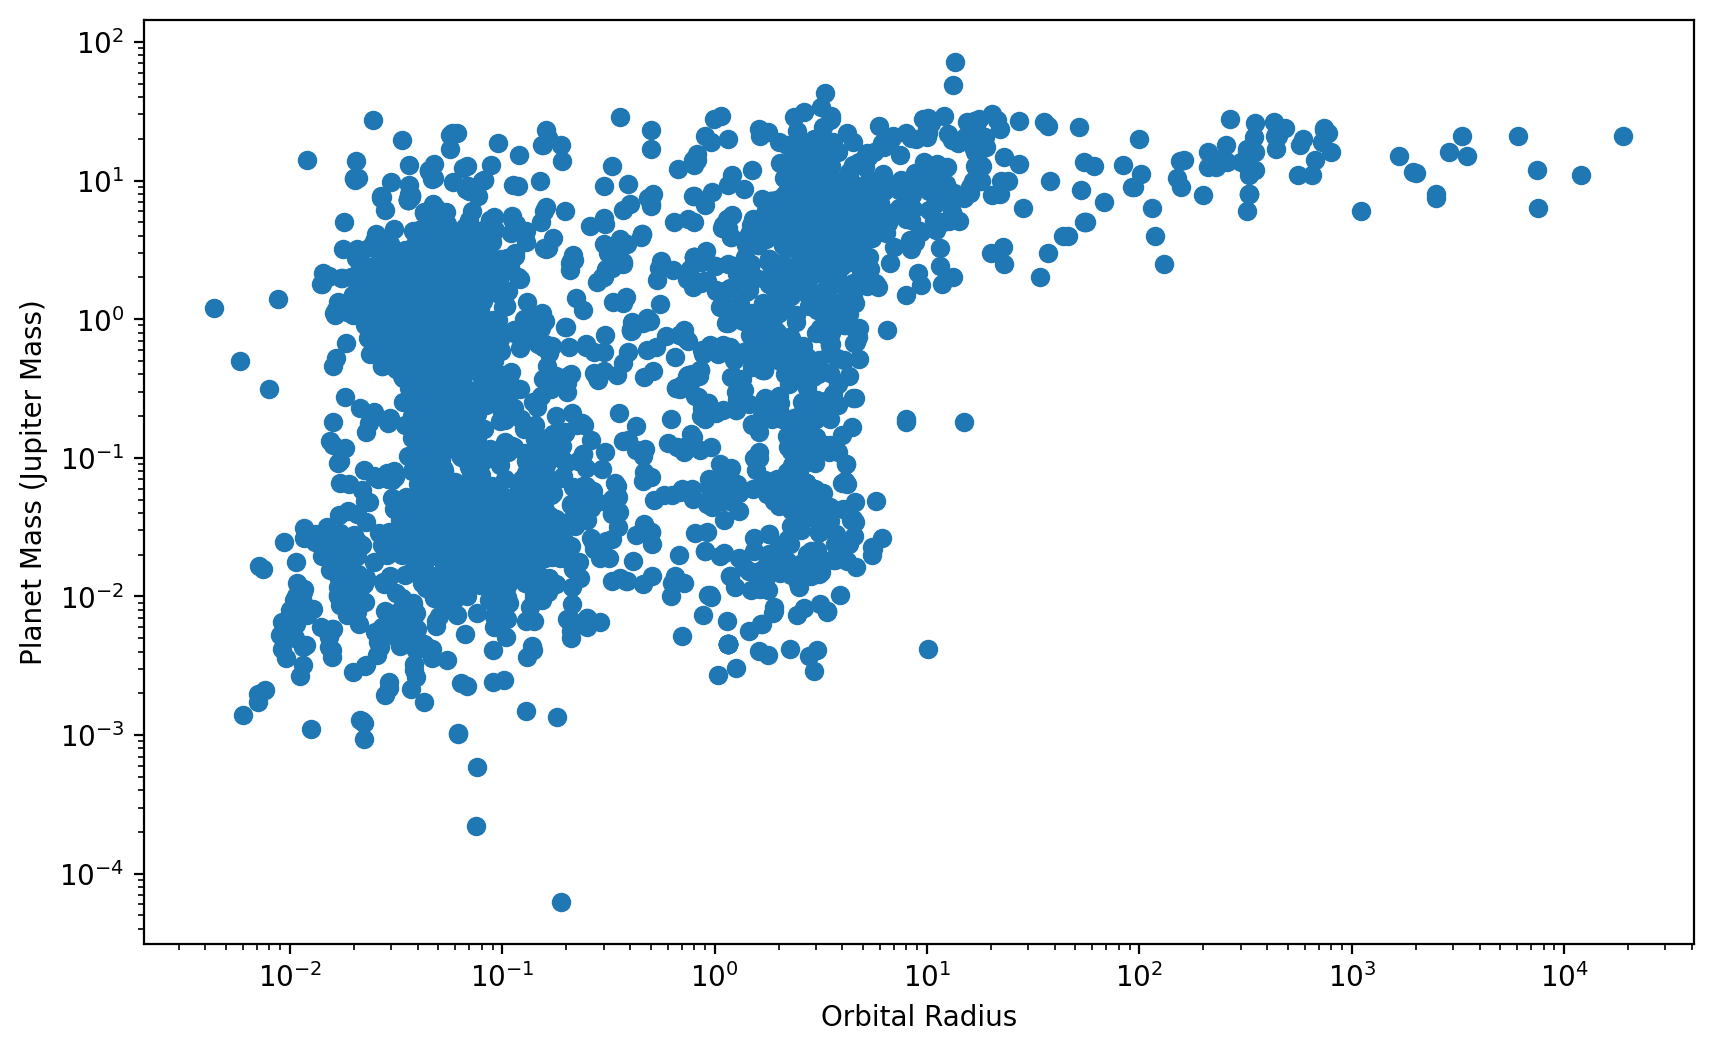

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(features['pl_orbsmax'], features['pl_massj'])
plt.xlabel('Orbital Radius')
plt.ylabel('Planet Mass (Jupiter Mass)')
plt.xscale('log'); plt.yscale('log')
plt.show()

(array([ 2.14352689,  8.83658022,  9.0990529 , 14.91719731, 17.89188768,
         9.7552346 ,  5.29319904,  4.28705377,  3.58712662,  2.49349046,
         2.36225412,  1.57483608,  1.61858153,  1.18112706,  1.04989072,
         1.39985429,  0.78741804,  0.78741804,  0.34996357,  0.61243625,
         0.61243625,  0.43745447,  0.26247268,  0.39370902,  0.34996357,
         0.17498179,  0.34996357,  0.13123634,  0.13123634,  0.26247268,
         0.30621813,  0.08749089,  0.17498179,  0.30621813,  0.21872723,
         0.21872723,  0.13123634,  0.21872723,  0.17498179,  0.13123634,
         0.26247268,  0.04374545,  0.13123634,  0.        ,  0.        ,
         0.13123634,  0.30621813,  0.04374545,  0.13123634,  0.        ,
         0.34996357,  0.17498179,  0.04374545,  0.08749089,  0.        ,
         0.08749089,  0.04374545,  0.        ,  0.04374545,  0.04374545,
         0.04374545,  0.        ,  0.08749089,  0.08749089,  0.08749089,
         0.08749089,  0.13123634,  0.04374545,  0.0

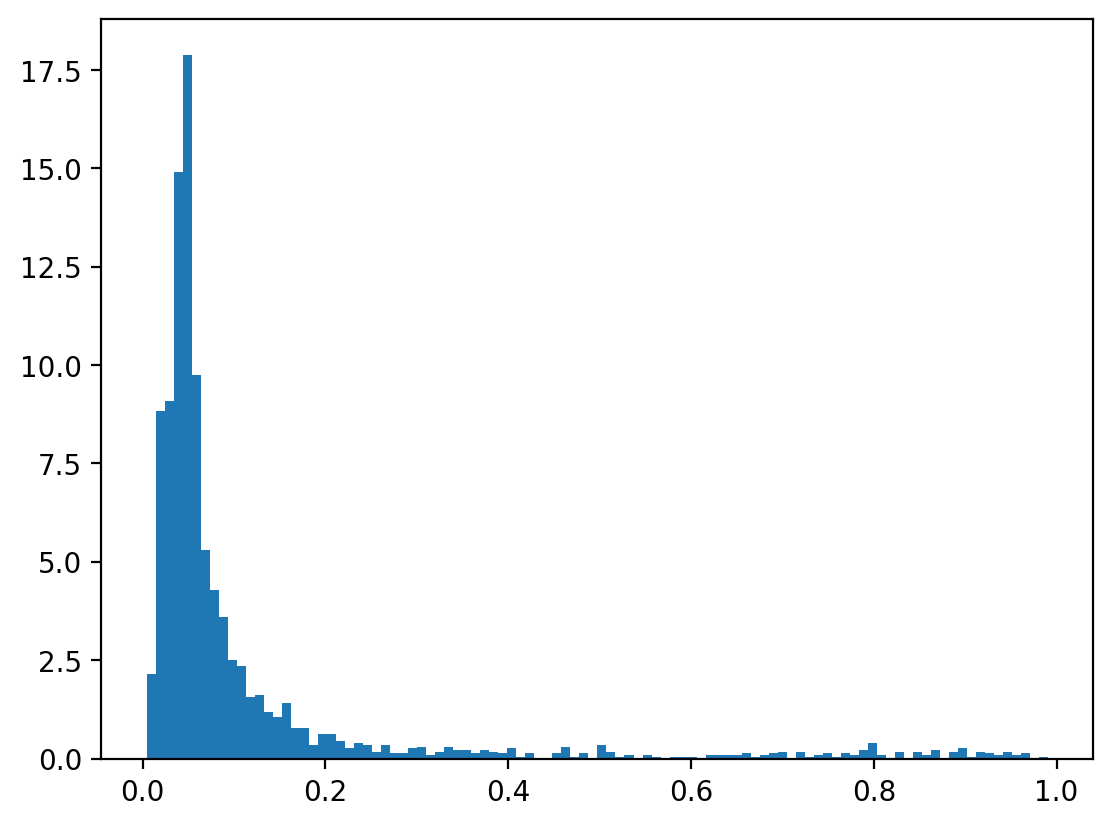

In [10]:
plt.hist(features['pl_orbsmax'][features['pl_orbsmax'] < 1], bins=100, density=True)

(array([7.33315919e-01, 2.11574125e-01, 9.64778012e-02, 6.98194614e-02,
        3.80833426e-02, 2.96203776e-02, 2.20037090e-02, 1.69259300e-02,
        1.56564853e-02, 9.30926152e-03, 1.43870405e-02, 1.01555580e-02,
        1.10018545e-02, 1.01555580e-02, 1.10018545e-02, 6.77037201e-03,
        5.07777901e-03, 7.19352026e-03, 7.61666851e-03, 5.50092726e-03,
        2.11574125e-03, 2.11574125e-03, 4.23148251e-03, 2.53888950e-03,
        4.23148251e-03, 2.11574125e-03, 3.80833426e-03, 4.65463076e-03,
        2.53888950e-03, 4.23148251e-03, 3.38518601e-03, 1.69259300e-03,
        1.69259300e-03, 2.11574125e-03, 1.26944475e-03, 0.00000000e+00,
        2.11574125e-03, 1.69259300e-03, 2.53888950e-03, 8.46296501e-04,
        1.69259300e-03, 4.23148251e-04, 4.23148251e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.23148251e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

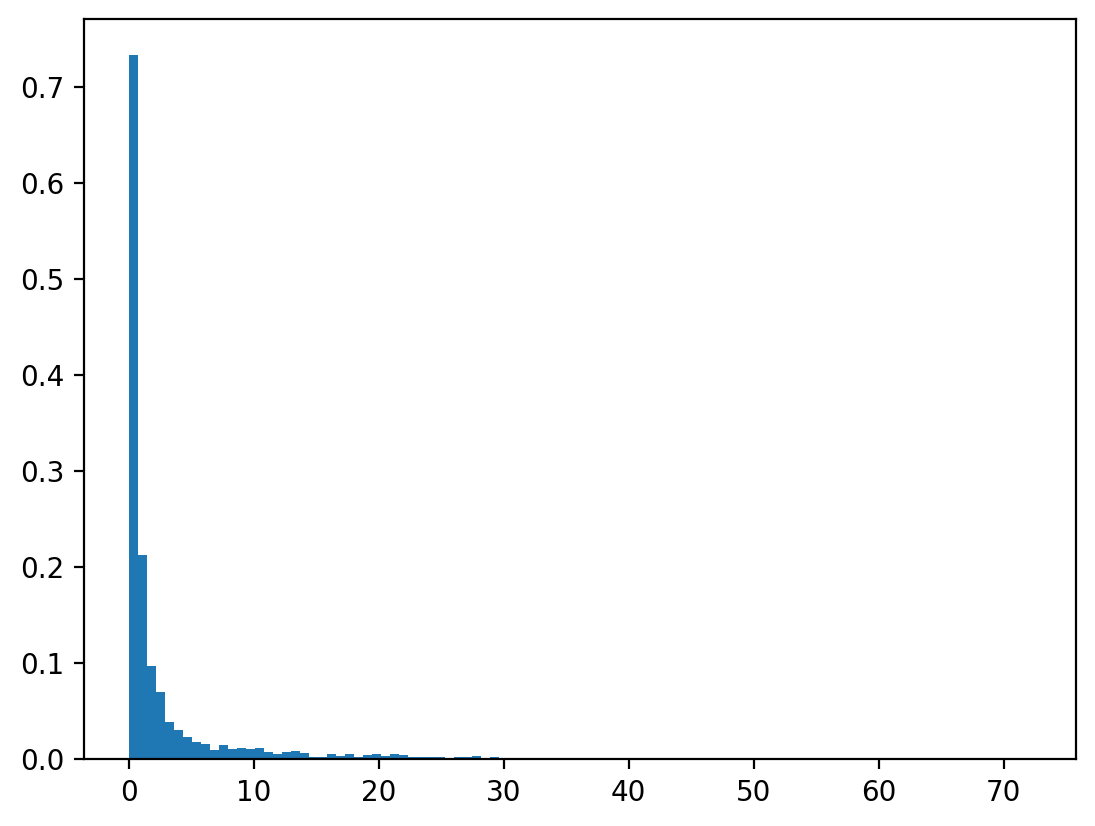

In [11]:
plt.hist(features['pl_massj'], bins=100, density=True)

###2D Histogram

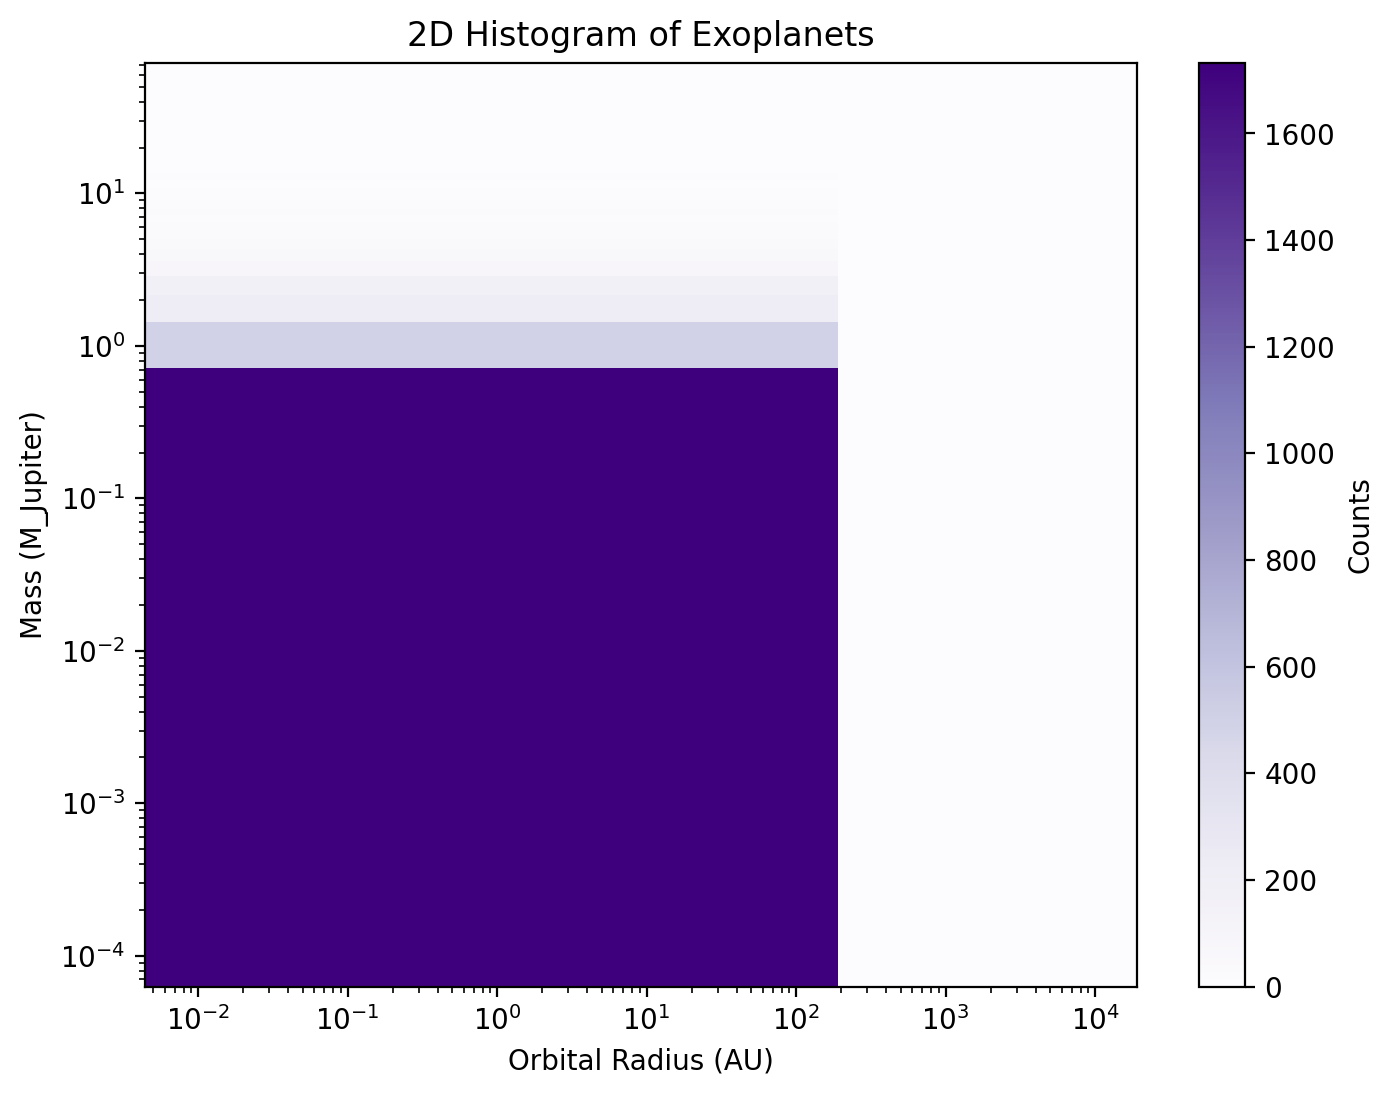

In [19]:
plt.figure(figsize=(8, 6))
plt.hist2d(df['pl_orbsmax'], df['pl_massj'], bins=100, cmap='Purples')
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Mass (M_Jupiter)")
plt.colorbar(label="Counts")
plt.title("2D Histogram of Exoplanets")
plt.xscale('log')
plt.yscale('log')
plt.show()

###KDE

In [14]:
x = np.log10(df['pl_orbsmax'].values)
y = np.log10(df['pl_massj'].values)

data = np.vstack([x, y]).T

In [15]:
kde = KernelDensity(bandwidth=0.3, kernel='gaussian')
kde.fit(data)

KernelDensity(bandwidth=0.3)

In [16]:
x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)
xx, yy = np.meshgrid(x_grid, y_grid)
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T

# Compute log-density
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(xx.shape)

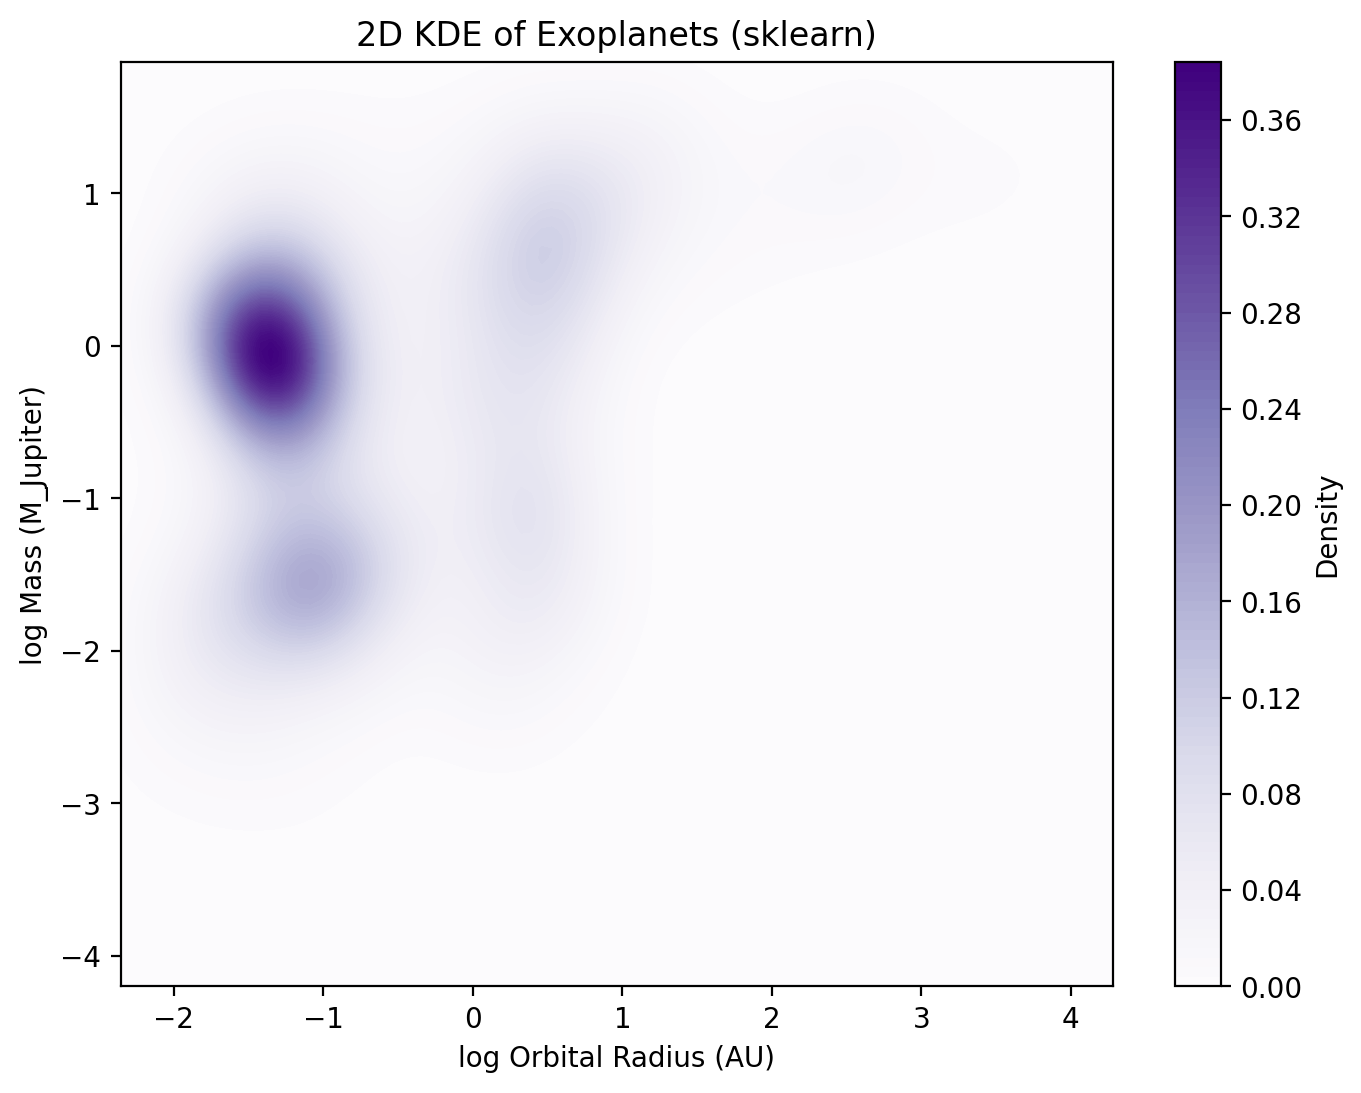

In [18]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, density, levels=100, cmap='Purples')
plt.xlabel("log Orbital Radius (AU)")
plt.ylabel("log Mass (M_Jupiter)")
plt.title("2D KDE of Exoplanets (sklearn)")
plt.colorbar(label='Density')
plt.show()

###Gaussian Mixture Model

N=1: AIC=17965.336414136636, BIC=17995.806779876984


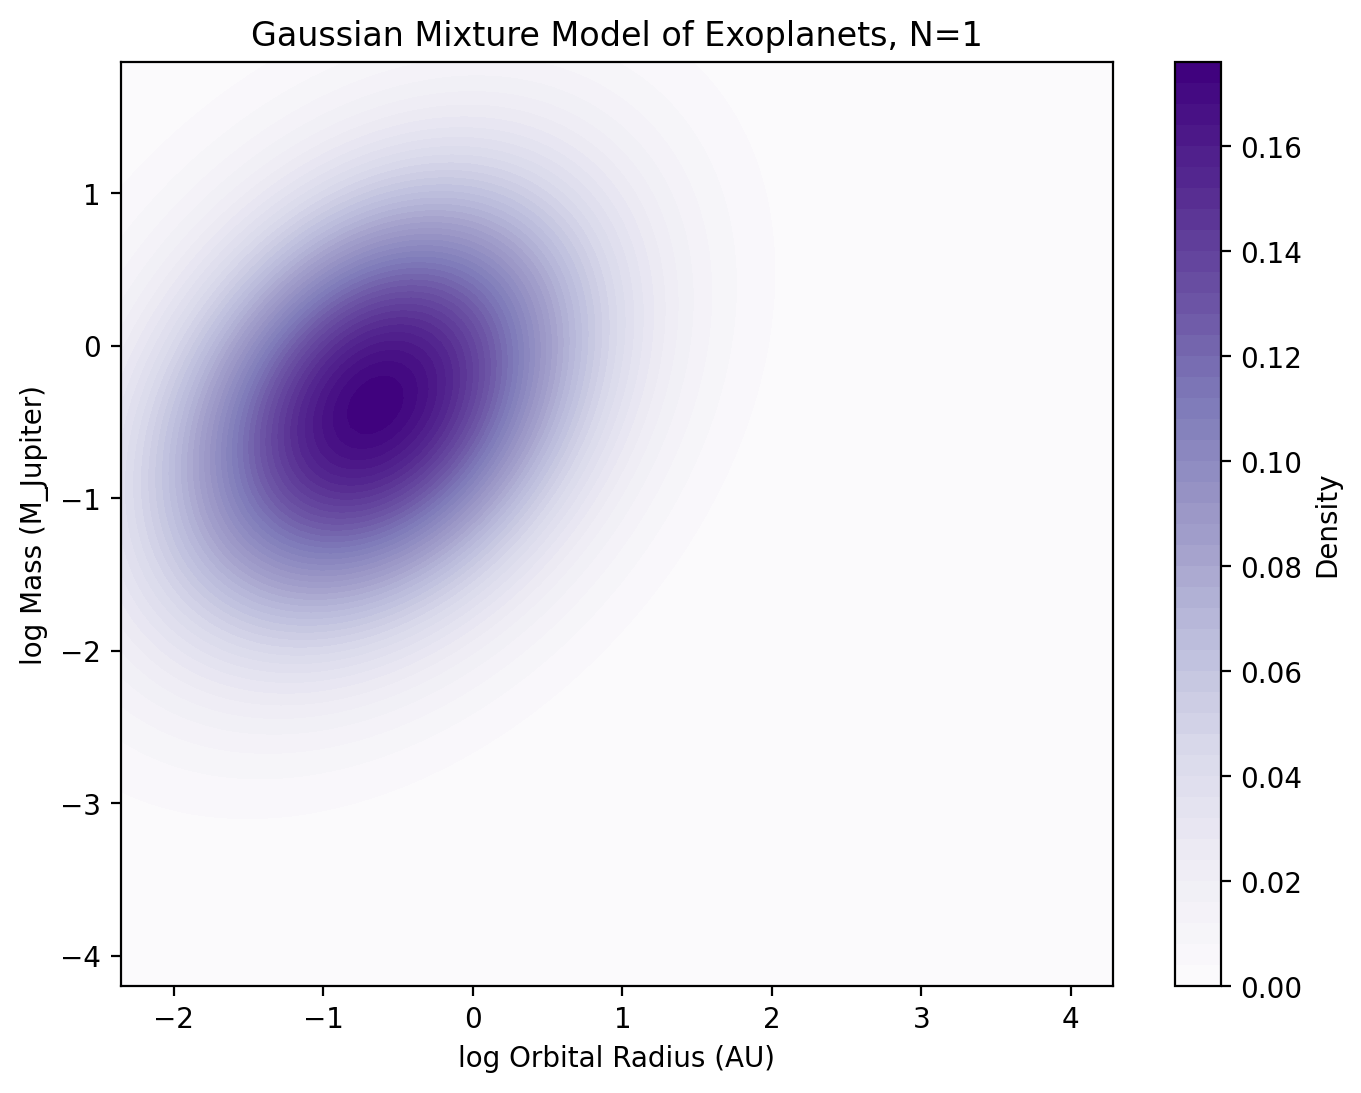

N=2: AIC=15321.98182418123, BIC=15389.016628809994


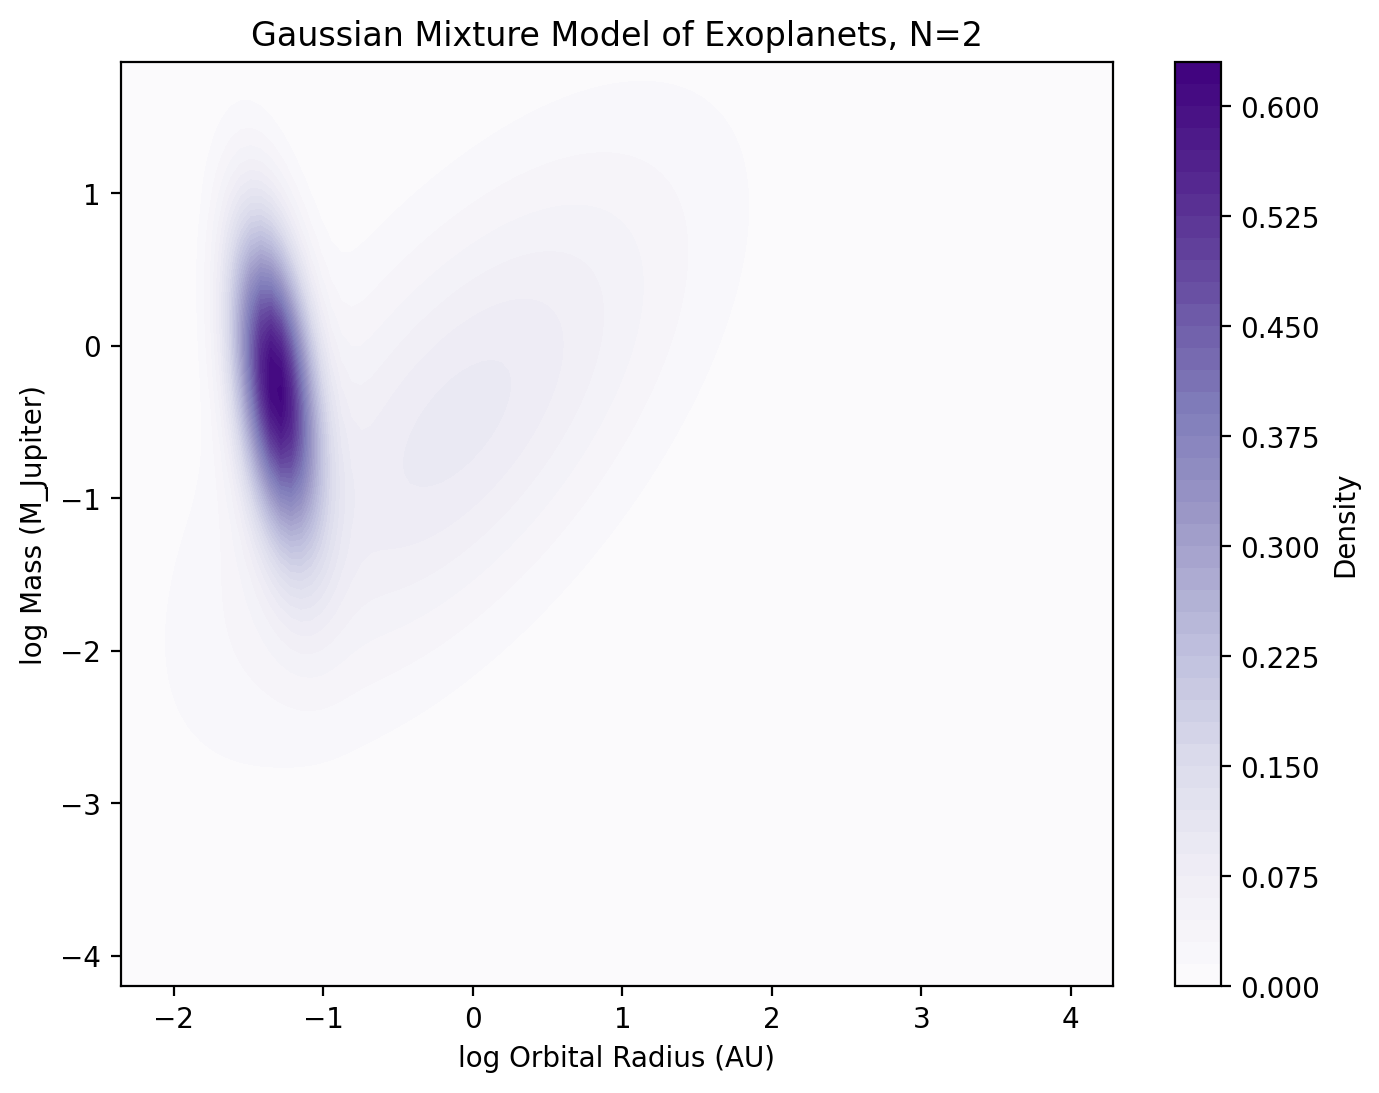

N=3: AIC=14530.002337344893, BIC=14633.601580862072


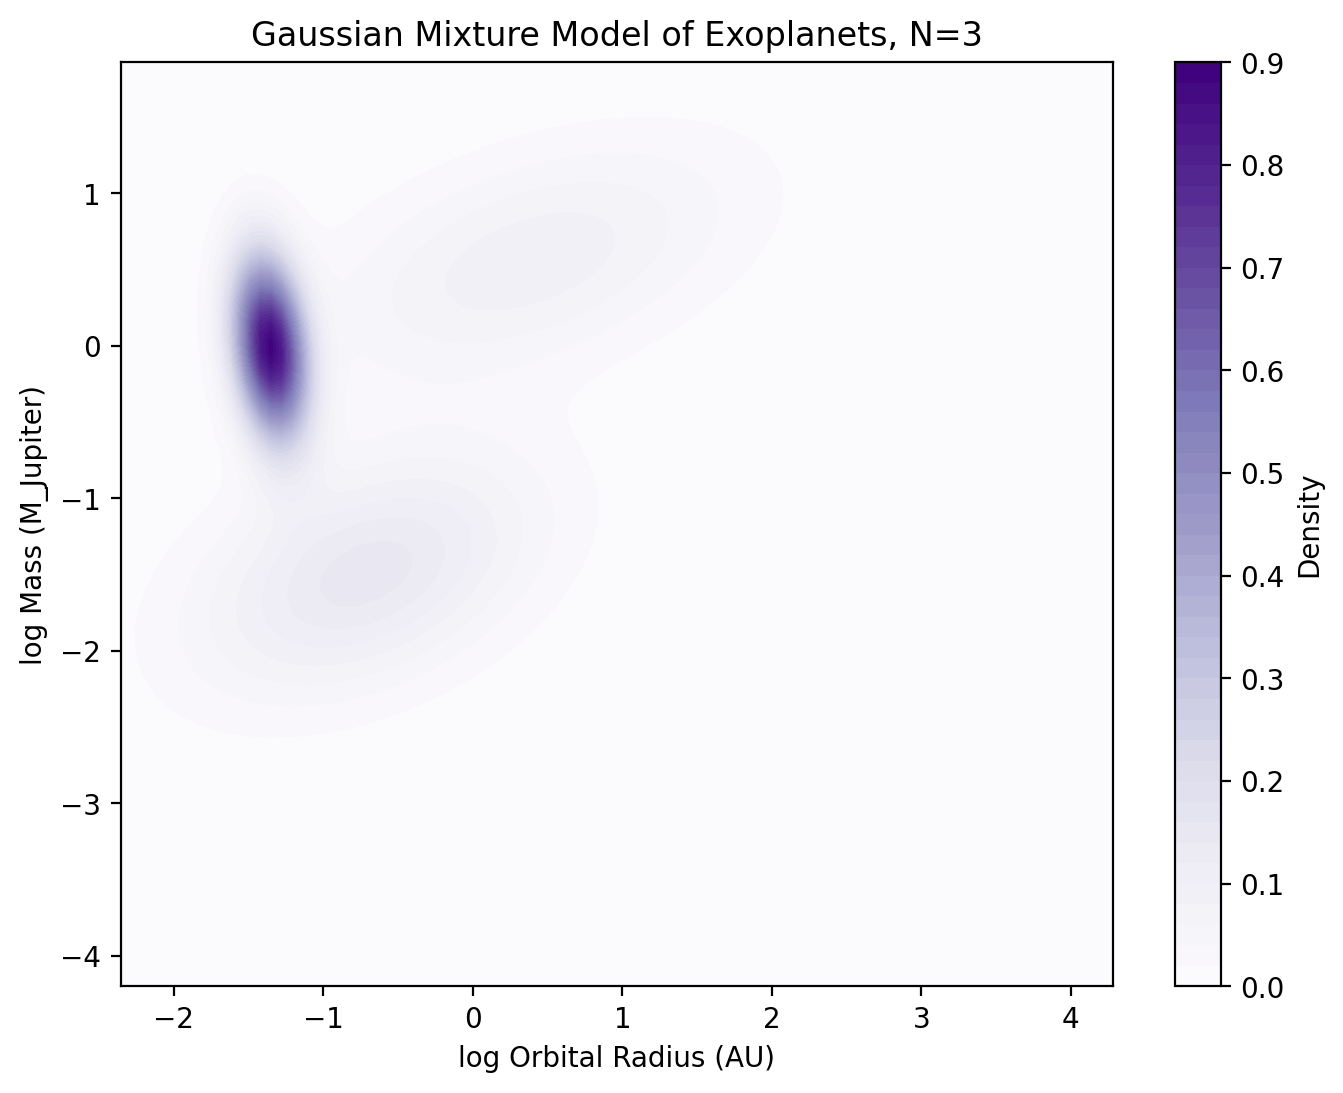

N=4: AIC=13745.32385325165, BIC=13885.487535657245


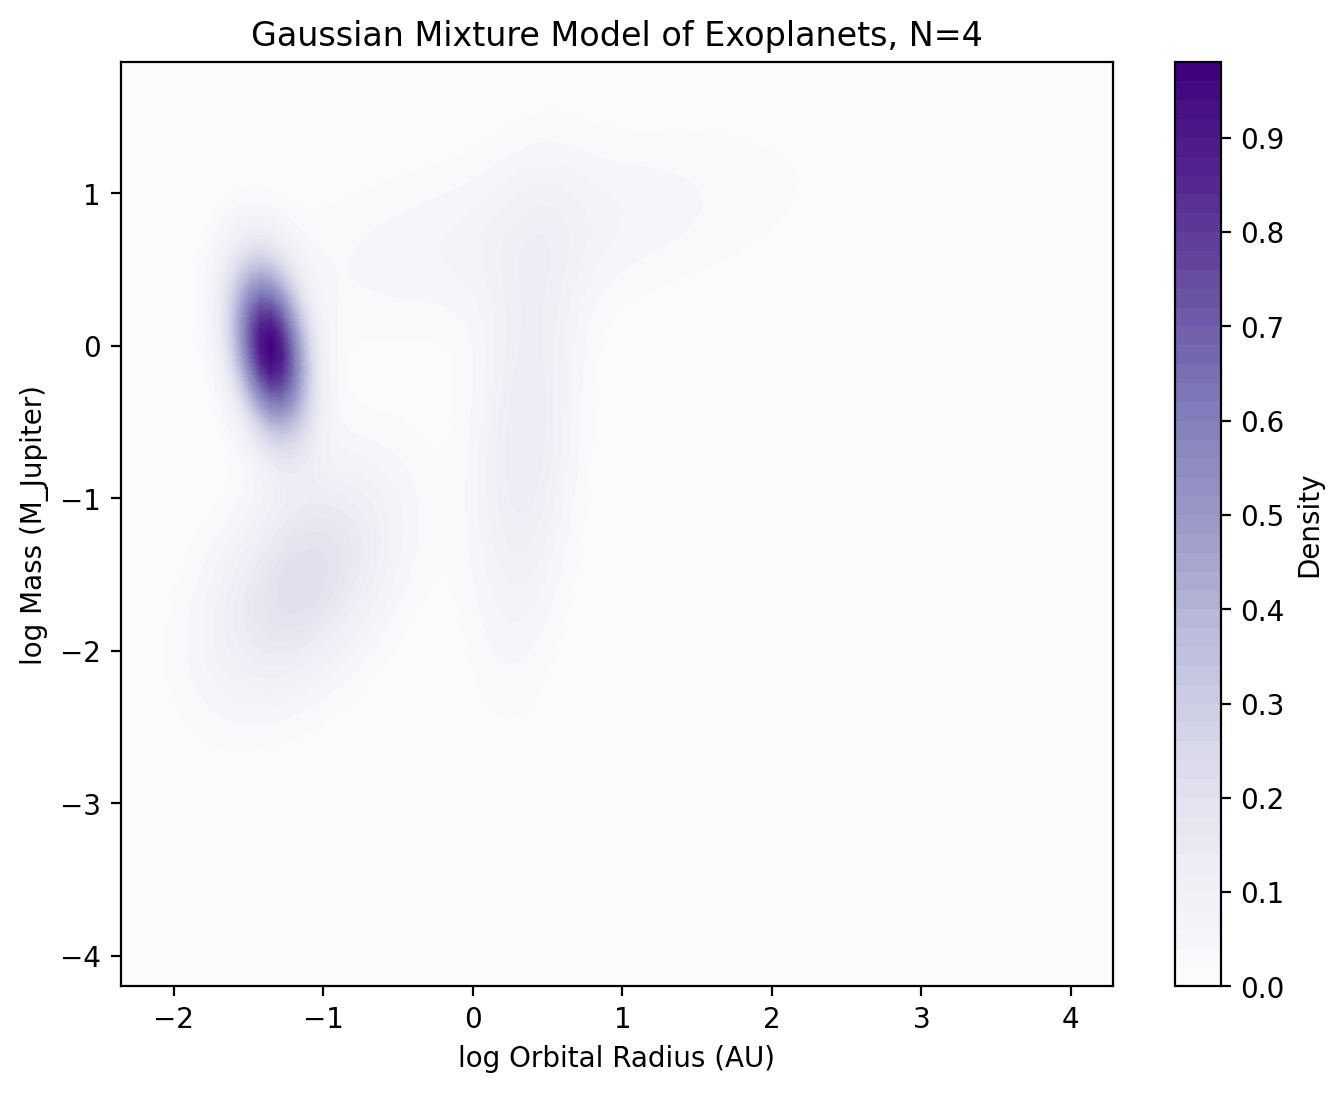

N=5: AIC=13678.864327672181, BIC=13855.592448966192


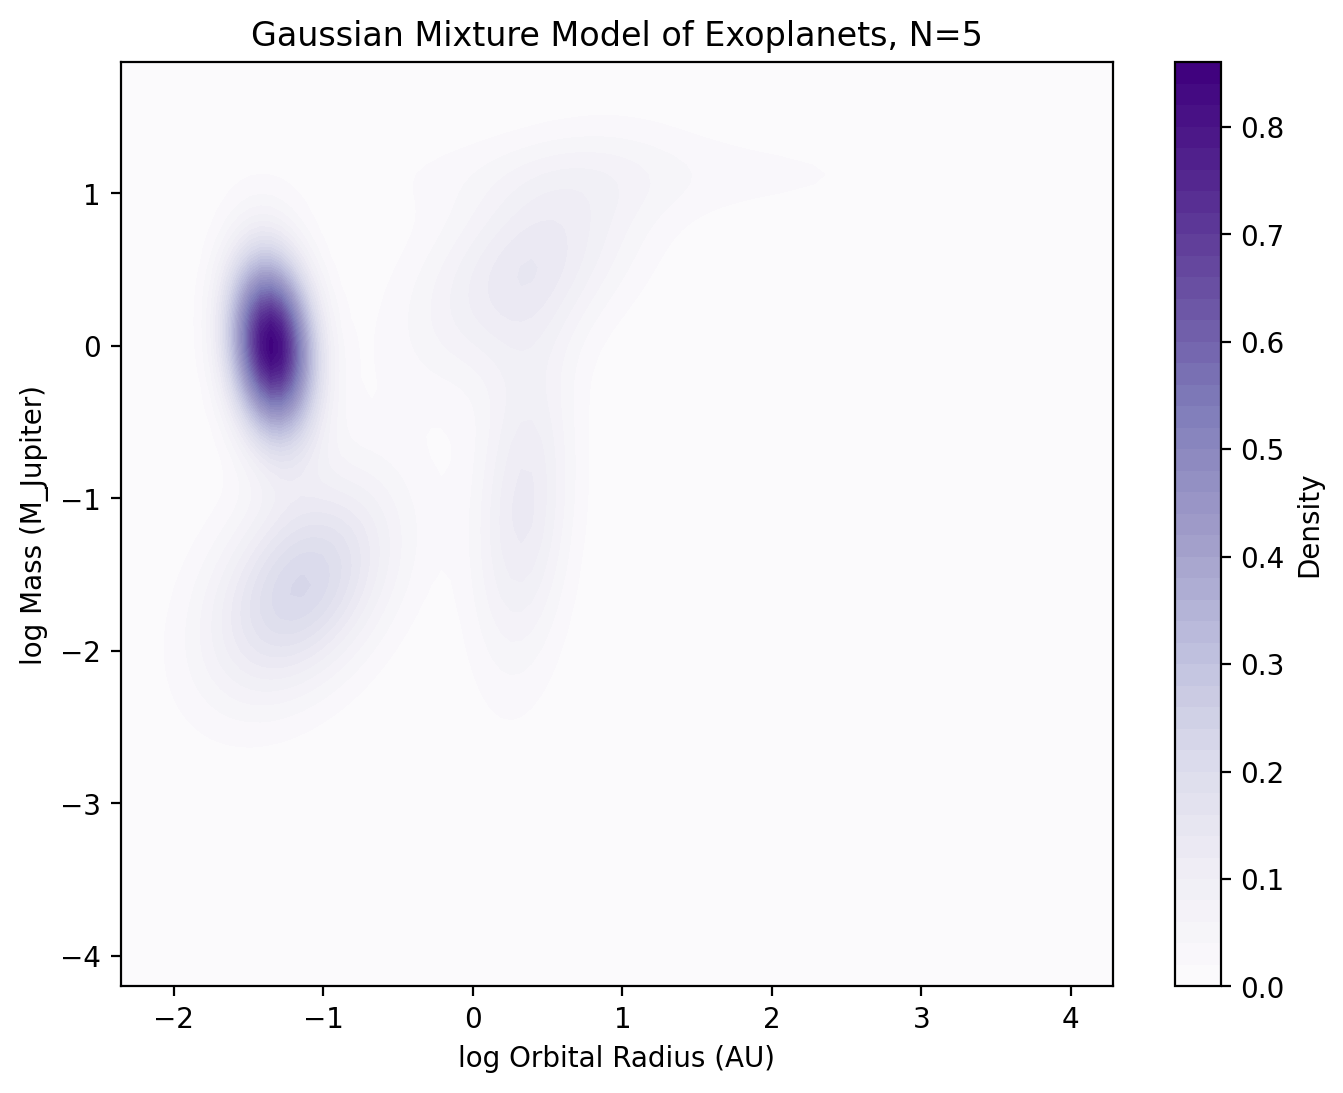

N=6: AIC=13641.505455058961, BIC=13854.79801524139


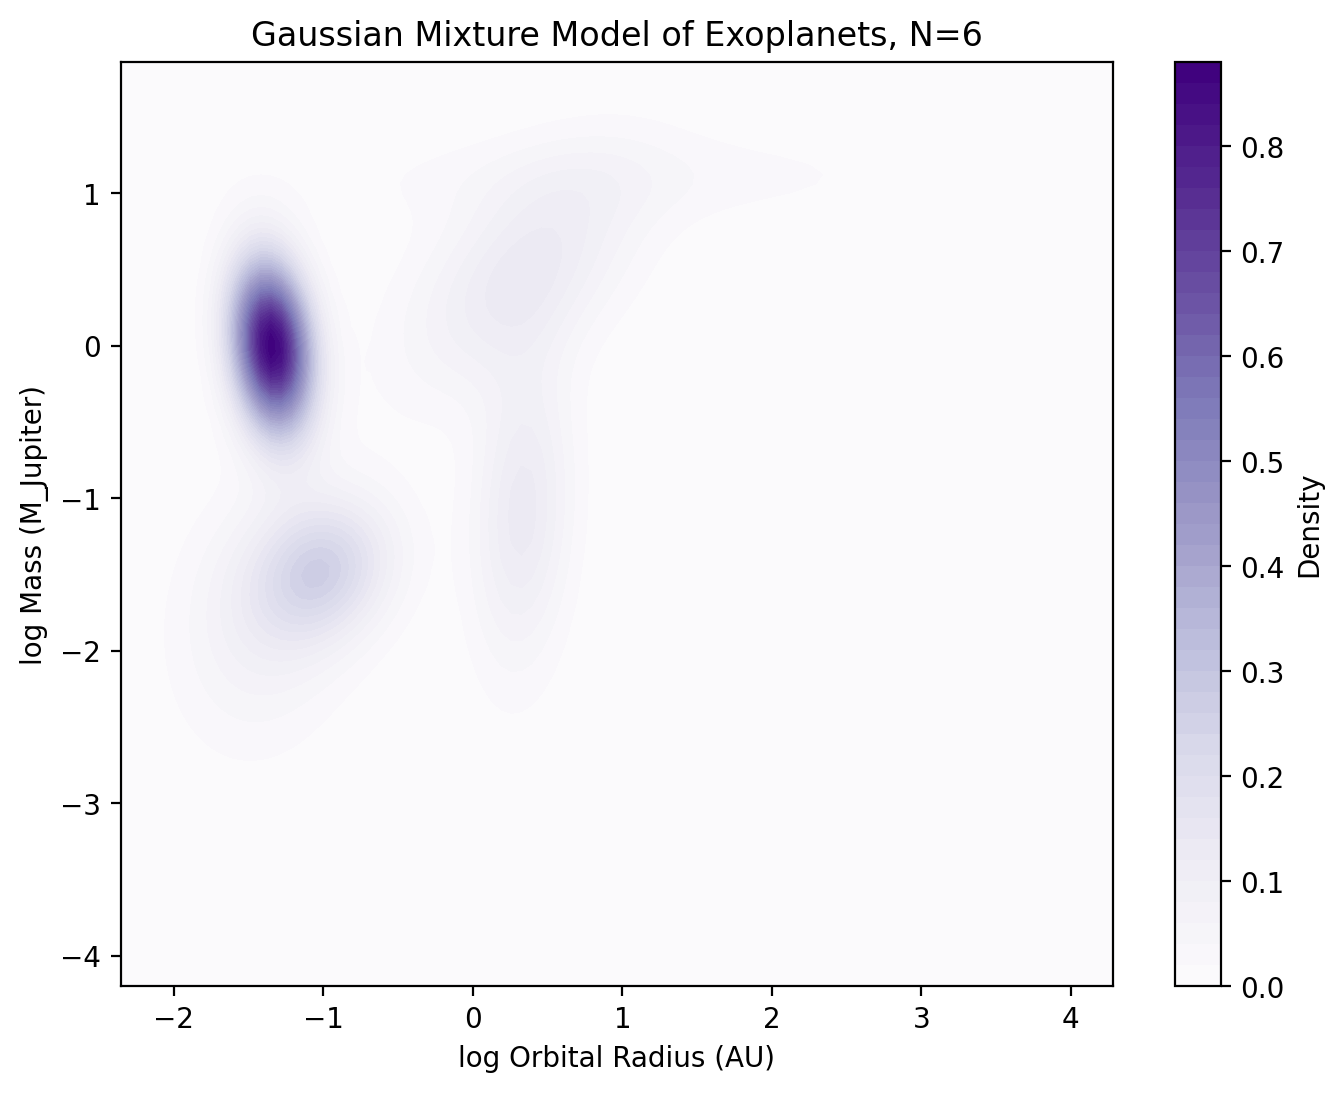

N=7: AIC=13409.989089877072, BIC=13659.846088947916


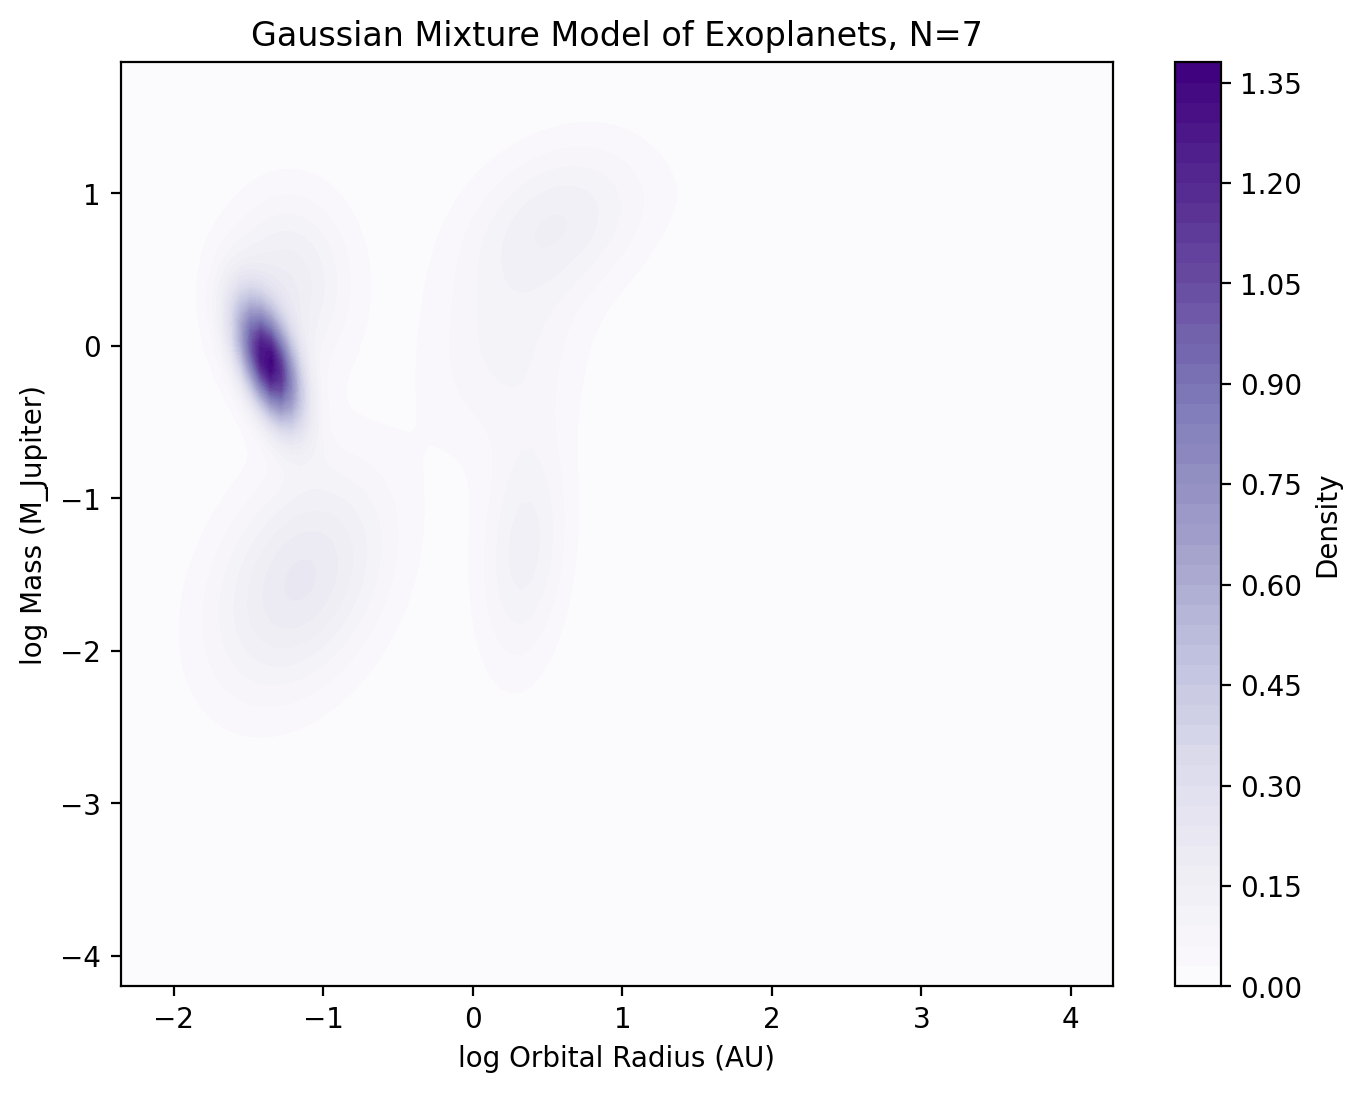

In [29]:
N = range(1, 8)
for i in N:
  gmm = GaussianMixture(n_components=i, covariance_type='full')
  gmm.fit(data)

  # Predict densities
  xx, yy = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 100),
                      np.linspace(data[:, 1].min(), data[:, 1].max(), 100))
  grid = np.column_stack([xx.ravel(), yy.ravel()])
  zz = np.exp(gmm.score_samples(grid)).reshape(xx.shape)

  aic = gmm.aic(data)
  bic = gmm.bic(data)

  print(f"N={i}: AIC={aic}, BIC={bic}")

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, zz, levels=50, cmap='Purples')
  plt.xlabel("log Orbital Radius (AU)")
  plt.ylabel("log Mass (M_Jupiter)")
  plt.title(f"Gaussian Mixture Model of Exoplanets, N={i}")
  plt.colorbar(label="Density")
  plt.show()

##Discovery Year Analysis

In [30]:
df['disc_year']

,disc_year
14,2002
27,2008
28,2008
29,2008
30,2008
...,...
38399,2018
38400,2018
38401,2018
38436,1999


(array([0.00037011, 0.00037011, 0.00074023, 0.00074023, 0.00370113,
        0.0012954 , 0.0055517 , 0.01461948, 0.00610687, 0.03775156,
        0.04904002, 0.03497571, 0.04478372, 0.04941013, 0.03904696,
        0.0568124 , 0.06680546, 0.03238492, 0.11288457, 0.04866991]),
 array([1992.  , 1993.65, 1995.3 , 1996.95, 1998.6 , 2000.25, 2001.9 ,
        2003.55, 2005.2 , 2006.85, 2008.5 , 2010.15, 2011.8 , 2013.45,
        2015.1 , 2016.75, 2018.4 , 2020.05, 2021.7 , 2023.35, 2025.  ]),
 <BarContainer object of 20 artists>)

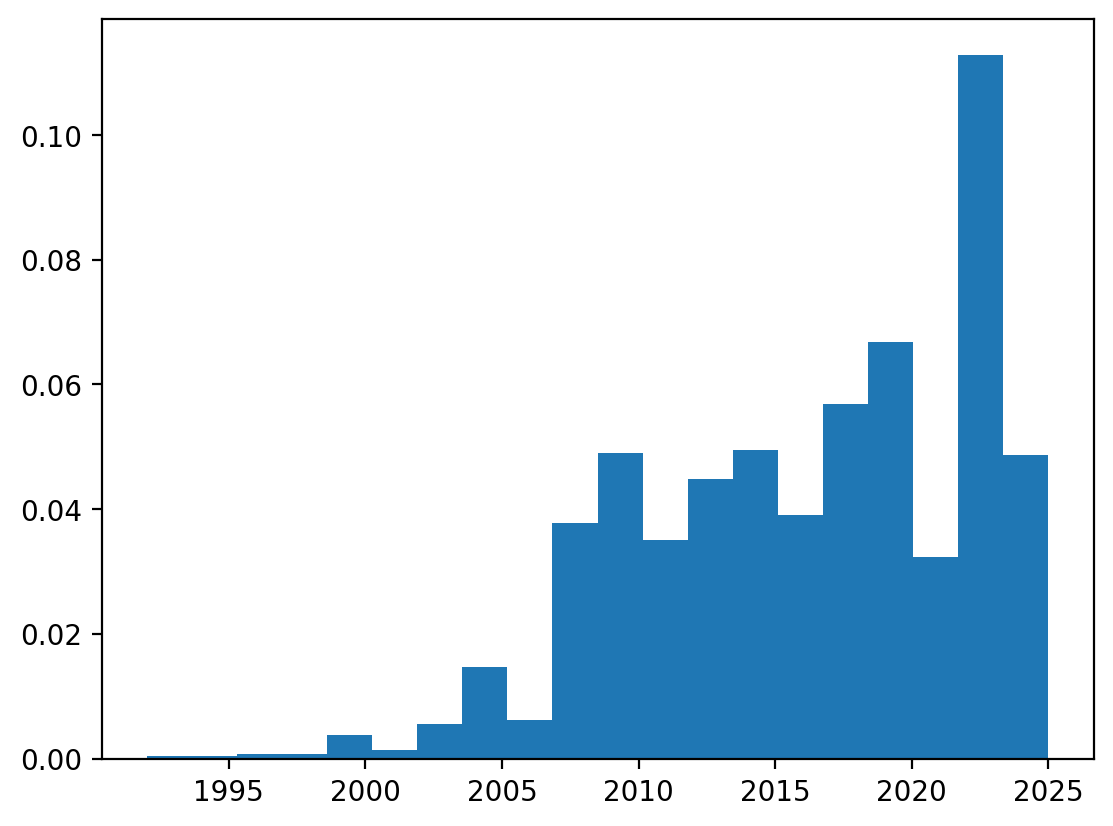

In [37]:
plt.hist(df['disc_year'], density=True, bins=20)